## ASSIGNMENT 1 - Backpropagation

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# set up Data
X = np.eye(8)    # input
Y = X.copy()     # output

n_input = 8
n_hidden = 3
n_output = 8

np.random.seed(0)   # for reproducibility

W1 = np.random.randn(n_input, n_hidden) * 0.1
b1 = np.zeros((1, n_hidden))
W2 = np.random.randn(n_hidden, n_output) * 0.1
b2 = np.zeros((1, n_output))

print(W1.shape, b1.shape)
print(W2.shape, b2.shape)
print(X.shape, Y.shape)


(8, 3) (1, 3)
(3, 8) (1, 8)
(8, 8) (8, 8)


In [15]:
# Activation Function

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)    


In [16]:
# Feedforward Phase 

def feedforwrd(X): 
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)  # hidden layer activations 

    z2 = np.dot(a1, W2) + b2
    Y_hat = sigmoid(z2)  # final output 

    return z1, z2, a1, Y_hat

In [17]:
# Backpropagation Phase 

def backprop(X, Y, a1, Y_hat, z1, z2, lr = 0.5) : 
    global W1, b1, W2, b2

    # Output layer error 
    error = Y_hat - Y
    dY_hat = error * sigmoid_derivative(z2) 

    # Hidden layer error 
    d_a1 = np.dot(dY_hat, W2.T) * sigmoid_derivative(z1)

    # Update weights and biases
    W2 -= np.dot(a1.T, dY_hat) * lr
    b2 -= np.sum(dY_hat, axis = 0, keepdims = True) * lr 

    W1 -= np.dot(X.T, d_a1) * lr
    b1 -= np.sum(d_a1, axis = 0, keepdims = True) * lr

    return np.mean(np.abs(Y - Y_hat))

In [18]:
# --- Training loop ---

def mse_loss(Y_hat, Y):
    return 0.5 * np.mean((Y_hat - Y)**2)

epochs = 10000
lr = 0.5

for epoch in range(epochs):
    # --- Forward ---
    z1, z2, a1, Y_hat = feedforwrd(X)

    # --- Compute loss ---
    loss = mse_loss(Y_hat, Y)

    # --- Backpropagation & update ---
    mae = backprop(X, Y, a1, Y_hat, z1, z2, lr)


    if epoch % 1000 == 0:
        print(f"Epoch {epoch:5d} | MSE loss: {loss:.6f} | MAE: {mae:.6f}")


print("\nFinal predictions after training:")
print(np.round(Y_hat, 3))


Epoch     0 | MSE loss: 0.125112 | MAE: 0.499326
Epoch  1000 | MSE loss: 0.008452 | MAE: 0.069709
Epoch  2000 | MSE loss: 0.001346 | MAE: 0.033687
Epoch  3000 | MSE loss: 0.000631 | MAE: 0.023704
Epoch  4000 | MSE loss: 0.000418 | MAE: 0.019411
Epoch  5000 | MSE loss: 0.000313 | MAE: 0.016833
Epoch  6000 | MSE loss: 0.000250 | MAE: 0.015063
Epoch  7000 | MSE loss: 0.000208 | MAE: 0.013751
Epoch  8000 | MSE loss: 0.000178 | MAE: 0.012729
Epoch  9000 | MSE loss: 0.000156 | MAE: 0.011903

Final predictions after training:
[[0.969 0.    0.    0.015 0.028 0.    0.014 0.   ]
 [0.    0.968 0.    0.    0.028 0.015 0.017 0.   ]
 [0.    0.    0.969 0.018 0.    0.02  0.02  0.   ]
 [0.024 0.    0.016 0.973 0.    0.    0.    0.022]
 [0.01  0.015 0.    0.    0.958 0.    0.    0.016]
 [0.    0.025 0.016 0.    0.    0.972 0.    0.023]
 [0.026 0.024 0.017 0.    0.    0.    0.972 0.   ]
 [0.    0.    0.    0.016 0.027 0.016 0.    0.969]]


In [26]:
# --- Training loop ---

def mse_loss(Y_hat, Y):
    return 0.5 * np.mean((Y_hat - Y)**2)

# Parameters
epochs = 10000
learning_rates = [0.1, 0.3, 0.5, 1.0, 1.5]

errors_dict = {}

for lr in learning_rates:
    print(f"\nTraining with learning rate = {lr}")

    # --- Same initialization for fair comparison ---
    np.random.seed(0)
    W1 = np.random.randn(n_input, n_hidden) * 0.1
    b1 = np.zeros((1, n_hidden))
    W2 = np.random.randn(n_hidden, n_output) * 0.1
    b2 = np.zeros((1, n_output))

    losses = []

    
    for epoch in range(epochs):
        # Forward
        z1, z2, a1, Y_hat = feedforwrd(X)

      
        loss = mse_loss(Y_hat, Y)
        losses.append(loss)

        # Backpropagation & update
        mae = backprop(X, Y, a1, Y_hat, z1, z2, lr)

        
        if epoch % 1000 == 0:
            print(f"Epoch {epoch:5d} | MSE loss: {loss:.6f} | MAE: {mae:.6f}")

    
    errors_dict[lr] = losses
    print(f"Final MSE for lr={lr}: {loss:.6f}")


Training with learning rate = 0.1
Epoch     0 | MSE loss: 0.125112 | MAE: 0.499326
Epoch  1000 | MSE loss: 0.046585 | MAE: 0.214918
Epoch  2000 | MSE loss: 0.028450 | MAE: 0.154589
Epoch  3000 | MSE loss: 0.016147 | MAE: 0.115588
Epoch  4000 | MSE loss: 0.010020 | MAE: 0.082186
Epoch  5000 | MSE loss: 0.008503 | MAE: 0.069496
Epoch  6000 | MSE loss: 0.007822 | MAE: 0.062849
Epoch  7000 | MSE loss: 0.007368 | MAE: 0.058588
Epoch  8000 | MSE loss: 0.006954 | MAE: 0.055322
Epoch  9000 | MSE loss: 0.006493 | MAE: 0.052345
Final MSE for lr=0.1: 0.005798

Training with learning rate = 0.3
Epoch     0 | MSE loss: 0.125112 | MAE: 0.499326
Epoch  1000 | MSE loss: 0.016081 | MAE: 0.115048
Epoch  2000 | MSE loss: 0.007809 | MAE: 0.062902
Epoch  3000 | MSE loss: 0.006625 | MAE: 0.052303
Epoch  4000 | MSE loss: 0.002991 | MAE: 0.043425
Epoch  5000 | MSE loss: 0.001575 | MAE: 0.033754
Epoch  6000 | MSE loss: 0.001078 | MAE: 0.028641
Epoch  7000 | MSE loss: 0.000822 | MAE: 0.025312
Epoch  8000 | MSE

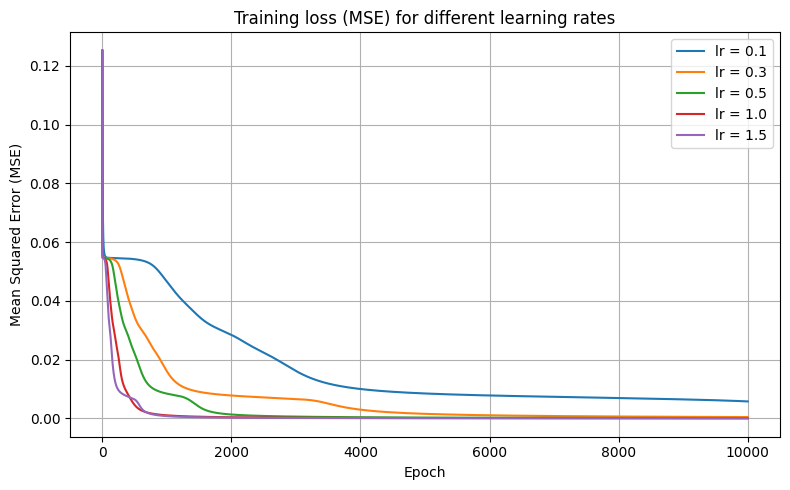

In [27]:
plt.figure(figsize=(8,5))
for lr, losses in errors_dict.items():
    plt.plot(losses, label=f"lr = {lr}")

plt.title("Training loss (MSE) for different learning rates")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
predicted_classes = np.argmax(Y_hat, axis=1)
true_classes = np.argmax(Y, axis=1)
accuracy = np.mean(predicted_classes == true_classes)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [21]:
print("W1 (input → hidden):")
print(np.round(W1, 3))
print("\nW2 (hidden → output):")
print(np.round(W2, 3))


W1 (input → hidden):
[[ 5.175 -5.118  0.972]
 [ 4.618  2.399 -4.618]
 [-6.216 -2.252 -0.923]
 [-1.082 -3.742  5.334]
 [ 5.118  4.974  5.077]
 [-2.068  4.715 -4.277]
 [ 0.202 -4.42  -5.55 ]
 [-4.873  3.786  3.617]]

W2 (hidden → output):
[[ 12.542  10.106 -16.843  -6.412   7.66   -9.073   5.361  -9.601]
 [ -9.653   4.69   -7.959 -10.455   5.641   8.303 -11.594   6.34 ]
 [  3.688  -9.253  -5.03   12.305   7.617 -10.086 -15.382   7.668]]


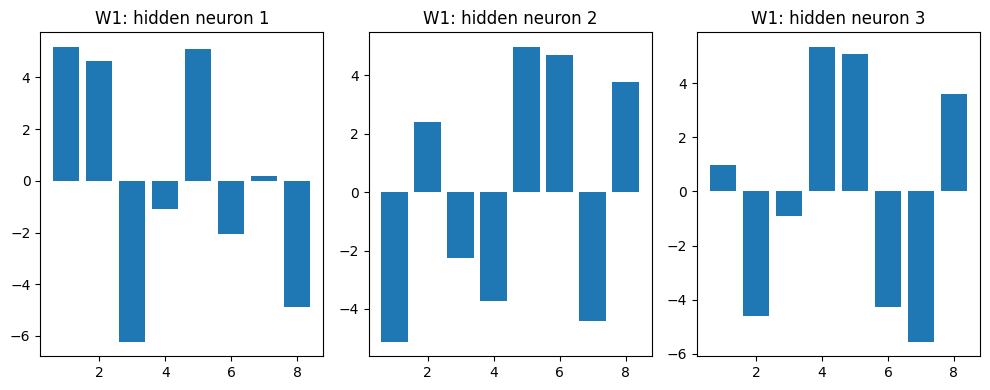

In [22]:

plt.figure(figsize=(10,4))
for i in range(n_hidden):
    plt.subplot(1,3,i+1)
    plt.bar(range(1, n_input+1), W1[:,i])
    plt.title(f"W1: hidden neuron {i+1}")
plt.tight_layout()
plt.show()


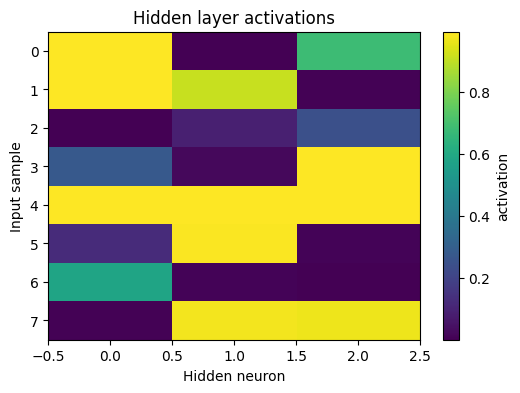

In [23]:
plt.figure(figsize=(6,4))
plt.imshow(a1, cmap='viridis', aspect='auto')
plt.colorbar(label='activation')
plt.xlabel('Hidden neuron')
plt.ylabel('Input sample')
plt.title('Hidden layer activations')
plt.show()

The heatmap of the hidden-layer activations shows that each of the three hidden neurons responds selectively to different subsets of the eight input samples.
None of the neurons simply mirrors one input node; instead, they act as feature detectors that encode combinations of input positions.
Together, these three activation patterns form a compact 3-dimensional latent representation that uniquely identifies each input pattern.
This confirms that the network has learned an efficient compressed code (similar to an autoencoder) for the eight one-hot input vectors.